# **Machine Learning for "Sure Tomorrow" Insurance**

## **Introduction**

Sure Tomorrow (not a real company) an innovative insurance company, is seeking to leverage machine learning to address several key business challenges. The company aims to enhance its marketing efforts, predict potential insurance claims, and estimate the size of claims for new clients. Additionally, safeguarding client data through effective anonymization methods is crucial to ensure privacy without compromising the quality of predictive models. This project focuses on evaluating the feasibility and effectiveness of machine learning solutions for these tasks.

### **Goals**

1. **Client Similarity Analysis**: Identify clients who match specific criteria to aid in targeted marketing. This involves finding clients with similar characteristics to enhance the efficiency of marketing campaigns.
   
2. **Claim Probability Prediction**: Predict whether a new client is likely to make an insurance claim. This will be assessed against a dummy model to determine if the machine learning model offers a significant improvement.

3. **Claim Amount Estimation**: Use linear regression to estimate the potential claim amount for new clients. This task will help in assessing the financial risk associated with new policies.

4. **Data Protection**: Implement data anonymization techniques to protect client information while preserving the effectiveness of the predictive models. The goal is to ensure that even if data is compromised, it remains unusable for malicious purposes.

### **Instructions**

1. **Data Loading and Preparation**: Begin by loading the dataset from `/datasets/insurance_us.csv`. Perform thorough data cleaning to address missing values, outliers, and any other anomalies.

2. **Task Implementation**: Complete each of the four tasks using machine learning techniques. For each task, answer the associated questions provided in the project template.

3. **Conclusion**: Summarize your findings and experiences from the project. Reflect on the effectiveness of your models and data protection measures.

4. **Code Utilization**: Utilize the initial code provided in the project template as a starting point. Some of this code will need to be completed to achieve the project goals.

### **Dataset Description**

The dataset is includes the following features:

- **Gender**: The gender of the insured individual.
- **Age**: The age of the insured individual.
- **Salary**: The salary of the insured individual.
- **Family Size**: The number of family members of the insured individual.

The target variable is the **Claim Amount**: The total amount of claims received by the insured individual over the past five years.

By addressing these tasks, you will help "Sure Tomorrow" improve their marketing strategies, better predict insurance claims, and manage client data securely.


## **Data Loadment and Exploratory**

In [61]:
pip install scikit-learn --upgrade

In [62]:
import numpy as np
import pandas as pd

import seaborn as sns
import math
import sklearn.metrics

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from IPython.display import display

### **Data Loadment**

In [63]:
df = pd.read_csv('/content/insurance_us.csv')

In [64]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [65]:
df.sample(5)

,gender,age,income,family_members,insurance_benefits
744,1,50.0,51700.0,1,2
2299,0,44.0,24600.0,3,1
4351,1,25.0,33400.0,1,0
822,1,37.0,30500.0,3,0
125,1,40.0,35100.0,1,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [67]:
# Change the age column data type from float to integer
df['age'] = df['age'].astype(int)

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [69]:
# Checking statistical figures
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [70]:
# Checking for duplicate data
df.duplicated().sum()

153

153 duplicate data were found, to avoid redundant calculations, these 153 data can be deleted.

In [71]:
df = df.drop_duplicates()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4847 non-null   int64  
 1   age                 4847 non-null   int64  
 2   income              4847 non-null   float64
 3   family_members      4847 non-null   int64  
 4   insurance_benefits  4847 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 227.2 KB


In [73]:
df.duplicated().sum()

0

In [74]:
# Checking for empty values ​​in data
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

**Summary**

1. Based on descriptive statistics, it can be seen that there are no problems with the dataset.
2. There are 153 rows that are duplicated and have been dropped duplicated to avoid redundant results.

### **Exploratory Data Analysis**

Data analysis and exploration are carried out to create an overall picture (summary) of the data so that it is easy to understand.

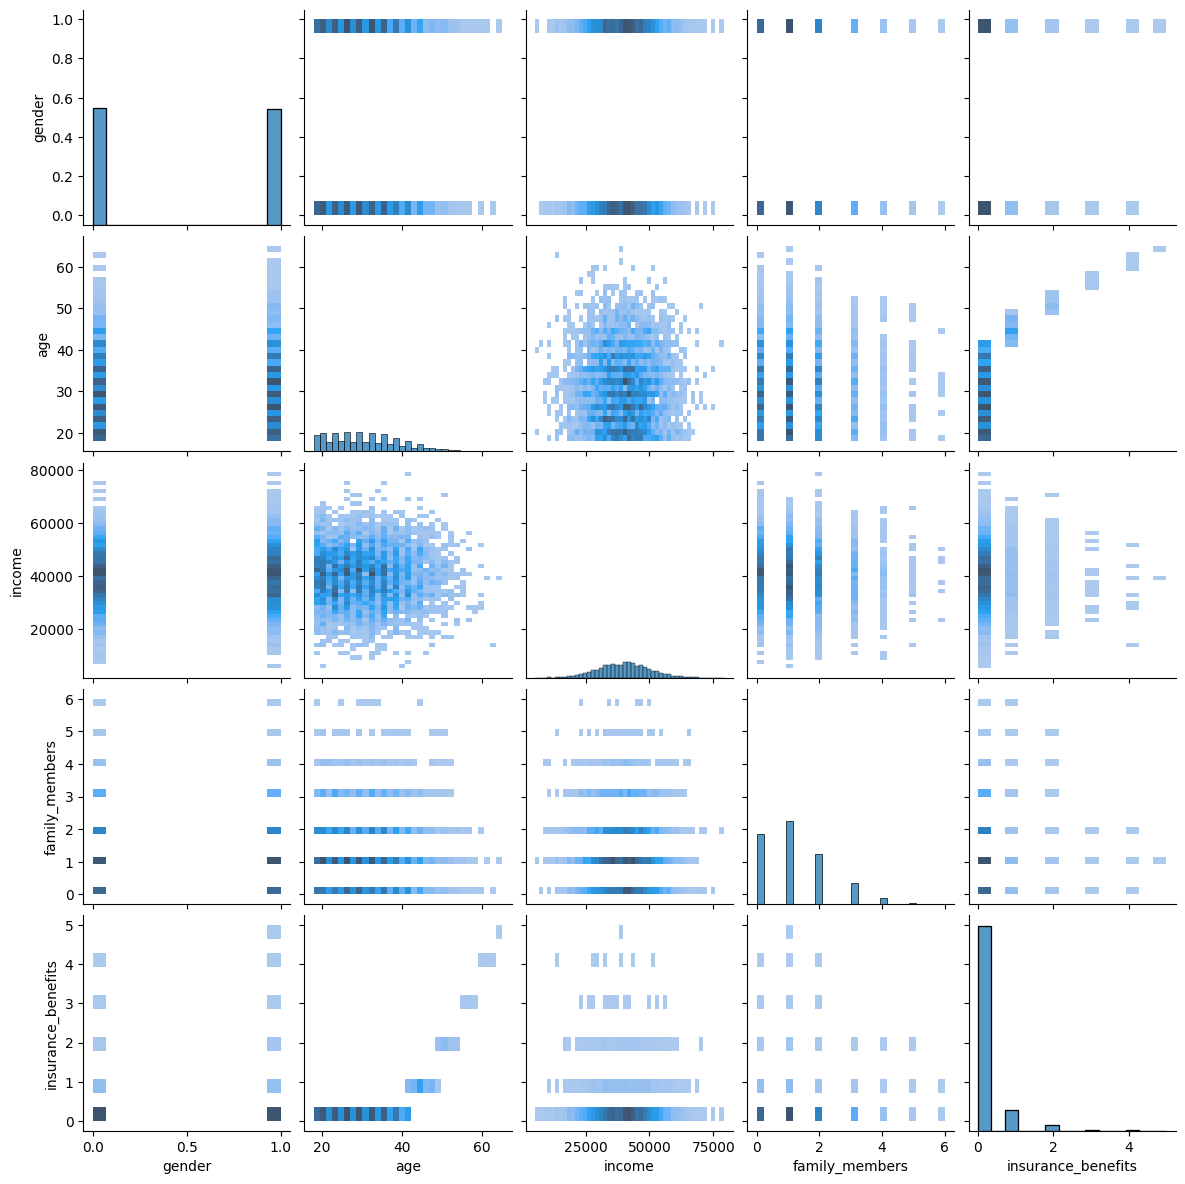

In [75]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

In [76]:
df.corr()

,gender,age,income,family_members,insurance_benefits
gender,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001953,1.000000,-0.017386,-0.009064,0.654964
income,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_benefits,0.011565,0.654964,-0.013123,-0.039303,1.000000


**Summary**

1. Based on the results of analysis and exploratory data, it was concluded that age has a positive effect on receiving benefits.

## **Client Similarity Analysis**

In the ML programming language, it is important to develop a procedure that can determine *k-nearest neighbors* (objects) for a particular object based on the distance between objects. The methods that can be used are:

- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To accomplish this task, we can try several distance metrics.

*k-nearest neighbors* will be used to measure the closest distance for the nth object based on a certain distance metric. The amount of insurance claims received does not need to be taken into account in this task.

An implementation of the kNN algorithm is already available in Scikit-learn (check this [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors).

Test the algorithm for four combinations of two cases
- Scaling
 - data is not scaled
 - data scaled with [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Distance Metrics
 - Euclid
 - Manhattan

In [77]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [78]:
def get_knn(df, n, k, metric):

    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)

    list_index = df.iloc[nbrs_indices[0]].index

    df_res = pd.concat([df.iloc[nbrs_indices[0]].reset_index(drop=True),
                        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance']).reset_index(drop=True)
        ], axis=1).set_index(list_index)

    return df_res


In [79]:
get_knn(df=df, n=10, k=5, metric='euclidean')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
10,1,25,36600.0,1,0,0.000000
4039,1,25,36600.0,2,0,1.000000
3247,1,26,36600.0,2,0,1.414214
2037,1,26,36600.0,0,0,1.414214
1949,0,24,36600.0,0,0,1.732051


In [80]:
# Set data scale
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [81]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
503,1,0.430769,0.520253,0.000000,0
1047,0,0.553846,0.372152,0.000000,0
9,1,0.492308,0.654430,0.166667,0
2003,1,0.338462,0.481013,0.166667,0
3887,1,0.292308,0.429114,0.166667,0


Now, let's get similar records for each existing combination

In [82]:
get_knn(df=df_scaled, n=10, k=5, metric='euclidean')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
10,1,0.384615,0.463291,0.166667,0,0.000000
4377,1,0.384615,0.473418,0.166667,0,0.010127
760,1,0.369231,0.462025,0.166667,0,0.015437
1389,1,0.369231,0.464557,0.166667,0,0.015437
2254,1,0.400000,0.455696,0.166667,0,0.017157


In [83]:
get_knn(df=df_scaled, n=10, k=5, metric='manhattan')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
10,1,0.384615,0.463291,0.166667,0,0.000000
4377,1,0.384615,0.473418,0.166667,0,0.010127
1389,1,0.369231,0.464557,0.166667,0,0.016650
760,1,0.369231,0.462025,0.166667,0,0.016650
2254,1,0.400000,0.455696,0.166667,0,0.022980


**Insight**

It can be seen between the two datasets that have not been scalarized and those that have not been scalarized tend to lead to the highest column values ​​such as the income column, while for data that has been scalarized it tends to be flatter.

There is no significant difference between the two.

## **Claim Probability Prediction**

With an insurance_benefits target of more than zero, we will evaluate whether the kNN classification model is a better approach than the *dummy* model.

Step:
- KNN based classifier and quality measurement with F1 metric for k=1..10 for original and scaled data. It will be interesting to see how k can affect the evaluation metrics, and whether scaling the data makes the results different. Use the kNN classification algorithm implementation available in Scikit-learn (check [this link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Random *dummy* model creation for this case. The model should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit; 0.5; 1.

The probability of paying an insurance claim can be defined as

$$
P\{\text{insurance claims received}\}=\frac{\text{number of clients who received insurance claims}}{\text{total number of clients}}.
$$

The overall data separation is 70:30 for the proportion of *training* and *test set*.

In [84]:
df.head()

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0


In [85]:
# Calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [86]:
df.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0


In [87]:
# check for class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()

insurance_benefits_received
0    4284
1     563
Name: count, dtype: int64

In [88]:
def dummy_model(probability, size=len(df)):
    rng = np.random.default_rng(seed=12)
    prediction = rng.binomial(n=1, p=probability, size=size)
    return prediction

In [89]:
def eval_classifier(y_true, y_pred, average=None):

    f1_score = sklearn.metrics.f1_score(y_true, y_pred, average=average)
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    print(f'F1: {f1_score*100:.2f}')
    print(f'Accuracy: {acc* 100:.2f}%')
    print('Matriks Kesalahan')
    print(cm)

In [90]:
y_true = df['insurance_benefits_received']

In [91]:
# Model predictions with a dummy with a proportion of 90:10
print('Prediksi model dummy dengan proporsi 90:10')
y_pred_dummy = dummy_model(probability=0.1, size=len(df))
eval_classifier(y_true, y_pred_dummy, average='weighted')
print('------------------------------------------')

# Model predictions with a dummy with a 50:50 proportion
print('Prediksi model dummy dengan proporsi 50:50')
y_pred_dummy = dummy_model(probability=0.5, size=len(df))
eval_classifier(y_true, y_pred_dummy, average='weighted')
print('------------------------------------------')

# Model predictions with a dummy with a proportion of 70:30
print('Prediksi model dummy dengan proporsi 70:30')
y_pred_dummy = dummy_model(probability=0.3, size=len(df))
eval_classifier(y_true, y_pred_dummy, average='weighted')
print('------------------------------------------')

Prediksi model dummy dengan proporsi 90:10
F1: 79.96
Accuracy: 80.59%
Matriks Kesalahan
[[3852  432]
 [ 509   54]]
------------------------------------------
Prediksi model dummy dengan proporsi 50:50
F1: 57.50
Accuracy: 48.63%
Matriks Kesalahan
[[2107 2177]
 [ 313  250]]
------------------------------------------
Prediksi model dummy dengan proporsi 70:30
F1: 70.01
Accuracy: 64.02%
Matriks Kesalahan
[[2936 1348]
 [ 396  167]]
------------------------------------------


In [92]:
# Train Test Split
X = df[feature_names]
y = df['insurance_benefits_received']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [93]:
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)
X_train.head()

,gender,age,income,family_members
0,-0.995881,-0.477092,-0.531363,-0.186188
1,-0.995881,-0.714066,1.535199,0.723825
2,-0.995881,-0.477092,0.194453,-0.186188
3,1.004136,1.537188,0.375908,1.633838
4,-0.995881,-1.306501,1.515037,-0.186188


In [94]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)
X_test.head()

,gender,age,income,family_members
0,1.004136,-0.240118,1.061402,-0.186188
1,-0.995881,-0.121631,-1.418473,-1.096201
2,-0.995881,1.063239,0.154130,1.633838
3,1.004136,0.115343,-0.813626,-1.096201
4,1.004136,1.655675,-0.420475,-1.096201


In [95]:
# Create a model using KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
# Predict data Training
y_pred_train = knn.predict(X_train)
eval_classifier(y_train, y_pred_train, average='weighted')

F1: 99.44
Accuracy: 99.44%
Matriks Kesalahan
[[3007    4]
 [  15  366]]


In [97]:
# Predict data Testing
y_pred_test = knn.predict(X_test)
eval_classifier(y_test, y_pred_test, average='weighted')

F1: 98.68
Accuracy: 98.69%
Matriks Kesalahan
[[1269    4]
 [  15  167]]


**Summary**

1. The dummy model has a low level of accuracy and F1 score compared to kNN classification.
2. The level of accuracy and F1 score on the train and test datasets using the kNN approach has a relatively high value at more than 98%.

## **Claim Amount Estimation**

With `insurance_benefit` as the target, evaluate what the RMSE is for the Linear Regression model.

LR is used in this sub-project. RMSE check for original data and scaled data.

Show
- $X$ — feature matrix, one row represents one case, each column is a feature, the first column consists of units
- $y$ — target (vector)
- $\hat{y}$ — target estimate (vector)
- $w$ — vector weight

The matrix for linear regression can be formulated as

$$
y = Xw
$$

Training objective to find $w$ that will minimize the L2 distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It looks like there is an analytical solution to the above problem:

$$
w = (X^T X)^{-1}
$$

The above formula can be used to find the weight $w$ and the last one can be used to calculate the predicted value

$$
\hat{y} = X_{val}w
$$

The entire data into *training set* and *validation set* are separated by a proportion of 70:30. Use of the RMSE metric for model evaluation.

In [98]:
class MyLinearRegression:

    def __init__(self):

        self.weights = None

    def fit(self, X, y):

        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):

        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights

        return y_pred

In [99]:
def eval_regressor(y_true, y_pred):

    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')

In [100]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


**Summary**

1. Obtained an RMSE score of 0.36.
2. Obtained an R2 score of 0.66.

## **Data Protection**

The best way to blur the data is to multiply the numerical features (remember that these features can be seen in the matrix $X$) by the invertible (*invertible*) matrix $P$.

$$
X' = ​​X \times P
$$

Inspection of how feature values ​​will look after transformation. The *invertible* property is very important in this case, so make sure of $P$ that $P$ is *invertible*.

In [101]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members', 'insurance_benefits', 'insurance_benefits_received']
df_pn = df[personal_info_column_list]

In [102]:
df_masking = df_pn.to_numpy()

In [103]:
# Create a random matrix 𝑃

rng = np.random.default_rng(seed=50)
P = rng.random(size=(df_masking.shape[1], df_masking.shape[1]))

In [104]:
# Checking whether the matrix 𝑃 is invertible

P_det = np.linalg.det(P)
print(P_det)

0.044415723471062166


In [105]:
df_masking = df_masking @ P
df_masking = pd.DataFrame(df_masking)
df_masking.columns = (['gender', 'age', 'income', 'family_members', 'insurance_benefits', 'insurance_benefits_received'])
df_masking.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,16294.895653,6231.998774,5545.771701,48847.092519,28756.798199,44264.791090
1,12485.357770,4782.492529,4255.352536,37427.435865,22047.251475,33918.366473
2,6899.465770,2644.408549,2352.282182,20683.754451,12186.343999,18745.466717
3,13698.018879,5231.913027,4657.080245,41063.043609,24163.911911,37208.727717
4,8575.314742,3282.987292,2920.862513,25705.786285,15138.185773,23295.388559


After the transformation is carried out, you can still determine the client's age and income because the masking result is not equal to 0.

In [106]:
# Returns data that has been masked

P_inv = np.linalg.inv(P)

In [107]:
df_balik = df_masking @ P_inv
df_balik.columns = (['gender', 'age', 'income', 'family_members', 'insurance_benefits', 'insurance_benefits_received'])
df_balik.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1.000000e+00,41.0,49600.0,1.000000e+00,3.158545e-11,-2.643845e-12
1,2.190586e-12,46.0,38000.0,1.000000e+00,1.000000e+00,1.000000e+00
2,1.862429e-12,29.0,21000.0,2.584016e-13,9.991418e-12,-2.746207e-13
3,3.052342e-12,21.0,41700.0,2.000000e+00,1.826698e-11,5.447303e-12
4,1.000000e+00,28.0,26100.0,6.999005e-12,9.132602e-12,4.799943e-12


In [108]:
# Masking check

pd.concat([df, df_masking, df_balik], axis=1, keys=['Asli', 'Masked', 'Returned']).head()

Asli                                                   \
  gender   age   income family_members insurance_benefits   
0    1.0  41.0  49600.0            1.0                0.0   
1    0.0  46.0  38000.0            1.0                1.0   
2    0.0  29.0  21000.0            0.0                0.0   
3    0.0  21.0  41700.0            2.0                0.0   
4    1.0  28.0  26100.0            0.0                0.0   

                                     Masked                            \
  insurance_benefits_received        gender          age       income   
0                         0.0  16294.895653  6231.998774  5545.771701   
1                         1.0  12485.357770  4782.492529  4255.352536   
2                         0.0   6899.465770  2644.408549  2352.282182   
3                         0.0  13698.018879  5231.913027  4657.080245   
4                         0.0   8575.314742  3282.987292  2920.862513   

                                                                     Returned  \
  family_members insurance_benefits insurance_benefits_received        gender   
0   48847.092519       28756.798199                44264.791090  1.000000e+00   
1   37427.435865       22047.251475                33918.366473  2.190586e-12   
2   20683.754451       12186.343999                18745.466717  1.862429e-12   
3   41063.043609       24163.911911                37208.727717  3.052342e-12   
4   25705.786285       15138.185773                23295.388559  1.000000e+00   

                                                                                
    age   income family_members insurance_benefits insurance_benefits_received  
0  41.0  49600.0   1.000000e+00       3.158545e-11               -2.643845e-12  
1  46.0  38000.0   1.000000e+00       1.000000e+00                1.000000e+00  
2  29.0  21000.0   2.584016e-13       9.991418e-12               -2.746207e-13  
3  21.0  41700.0   2.000000e+00       1.826698e-11                5.447303e-12  
4  28.0  26100.0   6.999005e-12       9.132602e-12                4.799943e-12

The dataset that has been masked and then returned to the original data shows changes in values ​​that are not too significant. This is due to rounding in floating point decisions.

## **Linear Regression Test with Protected Data**

Now, let's prove that Linear Regression can work computationally with the selected blurring transformation.

Create a procedure or class that performs linear regression with data blurring. You can use linear regression available in scikit-learn or your own.

Run a linear regression on the original and masked data, comparing the predicted values ​​and RMSE, as well as the value of the $R^2$ metric. Is there a difference?

**Procedure**

- Create a square matrix $P$ from random numbers.
- Check whether the matrix is ​​*invertible*. If not, repeat from the first step until we get an invertible (*invertible*) matrix.
- <! type your comment here !>
- Use $XP$ as the new feature matrix

In [109]:
df.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0


In [110]:
df_masking.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,16294.895653,6231.998774,5545.771701,48847.092519,28756.798199,44264.791090
1,12485.357770,4782.492529,4255.352536,37427.435865,22047.251475,33918.366473
2,6899.465770,2644.408549,2352.282182,20683.754451,12186.343999,18745.466717
3,13698.018879,5231.913027,4657.080245,41063.043609,24163.911911,37208.727717
4,8575.314742,3282.987292,2920.862513,25705.786285,15138.185773,23295.388559


In [111]:
X = df_masking[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_masking['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)
X_train.head()

,gender,age,income,family_members
0,-0.286883,-0.283143,-0.286276,-0.283262
1,0.222912,0.216398,0.222218,0.216424
2,0.161565,0.165727,0.162354,0.165724
3,0.684123,0.684837,0.684240,0.684893
4,-0.717840,-0.712355,-0.716893,-0.712505


In [115]:
lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[23152.40762084  -973.95443837 -6150.85799407  3494.73189756
  9430.91914151]
RMSE: 308972452.12
R2: -2930919431.73


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Summary**

1. After masking, the RMSE value is 0.36 and R2 is 0.66, which indicates that the masked data does not produce a different value from the original data.

## **Conclusion**

1. Based on descriptive statistics, it can be seen that there are no problems with the dataset.
2. There are 153 rows that are duplicated and have been dropped duplicated to avoid redundant results.
3. Based on the results of analysis and exploratory data, it was concluded that age has a positive effect on receiving benefits.
4. The dummy model has a low level of accuracy and F1 score compared to kNN classification.
5. The level of accuracy and F1 score on the train and test datasets using the kNN approach has a relatively high value at more than 98%.
6. Obtained an RMSE score of 0.36.
7. Obtained an R2 score of 0.66.
8. After masking, the RMSE value is 0.36 and R2 is 0.66, which indicates that the masked data does not produce a different value from the original data.